### Importing necessary libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.optimize import minimize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Generating the data

In [16]:
# Generate synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=3)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Label'] = y

# Display the first few rows of the DataFrame
print(df.head())

   Feature 1  Feature 2  Label
0  -3.946720   8.457309     -1
1   7.889033   5.134576      1
2  -4.142346   9.347054     -1
3   7.106059   7.663549      1
4   5.322259   5.894598      1


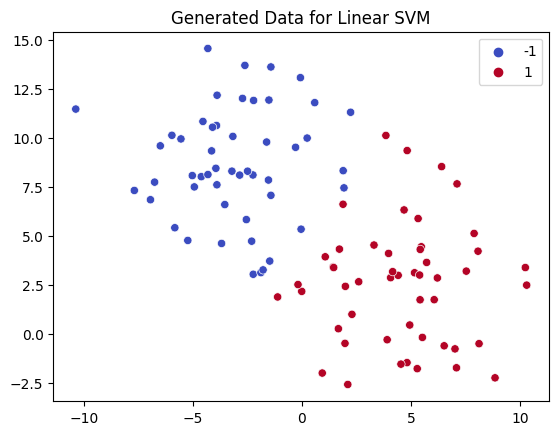

In [17]:
# Visualize the data
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm')
plt.title('Generated Data for Linear SVM')
plt.show()

### Split the data into Training and Test Sets

In [18]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (80, 2)
Test Data Shape: (20, 2)


### Implementing SVM

In [19]:
# Define the SVM objective function
def objective(params):
    w = params[:-1]
    b = params[-1]
    return 0.5 * np.dot(w, w)

In [20]:
# Define the SVM constraint function for the training data
def constraint_train(params):
    w = params[:-1]
    b = params[-1]
    return y_train * (np.dot(X_train, w) + b) - 1

In [21]:
initial_params_train = np.zeros(X_train.shape[1] + 1)

In [22]:
# Constraints for each sample in the training set
constraints_train = [{'type': 'ineq', 'fun': constraint_train}]

In [23]:
# Solve the optimization problem using the training data
solution_train = minimize(objective, initial_params_train, constraints=constraints_train, method='SLSQP')

In [24]:
# Extract the optimal parameters
w_opt_train = solution_train.x[:-1]
b_opt_train = solution_train.x[-1]

print("Optimal Weights (Training):", w_opt_train)
print("Optimal Bias (Training):", b_opt_train)

Optimal Weights (Training): [ 1.98473718 -1.19525343]
Optimal Bias (Training): 5.479195109742008


In [25]:
# Predict function
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

In [26]:
y_pred = predict(X_test, w_opt_train, b_opt_train)

### Accuracy and prediction visualisation

In [27]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9500
Precision: 0.9000
Recall: 1.0000
F1 Score: 0.9474
Confusion Matrix:
[[10  1]
 [ 0  9]]


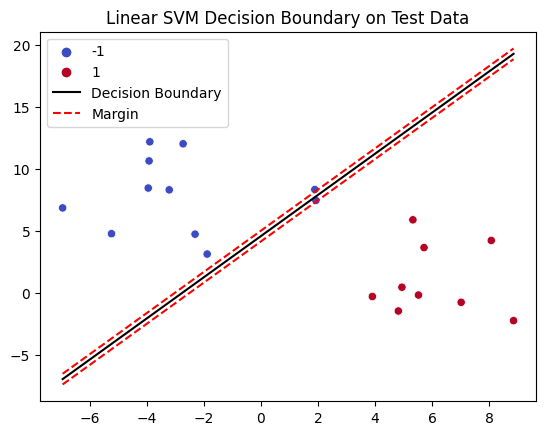

In [28]:
# Plot the test data
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='coolwarm')

# Plot the decision boundary
x_vals_test = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals_test = -(w_opt_train[0] * x_vals_test + b_opt_train) / w_opt_train[1]
plt.plot(x_vals_test, y_vals_test, color='black', label='Decision Boundary')

# Plot the margins
margin_test = 1 / np.sqrt(np.sum(w_opt_train ** 2))
y_vals_margin1_test = y_vals_test + margin_test
y_vals_margin2_test = y_vals_test - margin_test
plt.plot(x_vals_test, y_vals_margin1_test, 'r--', label='Margin')
plt.plot(x_vals_test, y_vals_margin2_test, 'r--')

plt.title('Linear SVM Decision Boundary on Test Data')
plt.legend()
plt.show()